gpt-3.5-turbo single_turn
2 (50 evals)| All defect: 1.0, All coop: 0.0
3 (50 evals)| All defect: 1.0, All coop: 0.0
4 (50 evals)| All defect: 1.0, All coop: 0.0
5 (50 evals)| All defect: 1.0, All coop: 0.0
8 (50 evals)| All defect: 1.0, All coop: 0.0
10 (50 evals)| All defect: 1.0, All coop: 0.0
30 (50 evals)| All defect: 0.0, All coop: 1.0


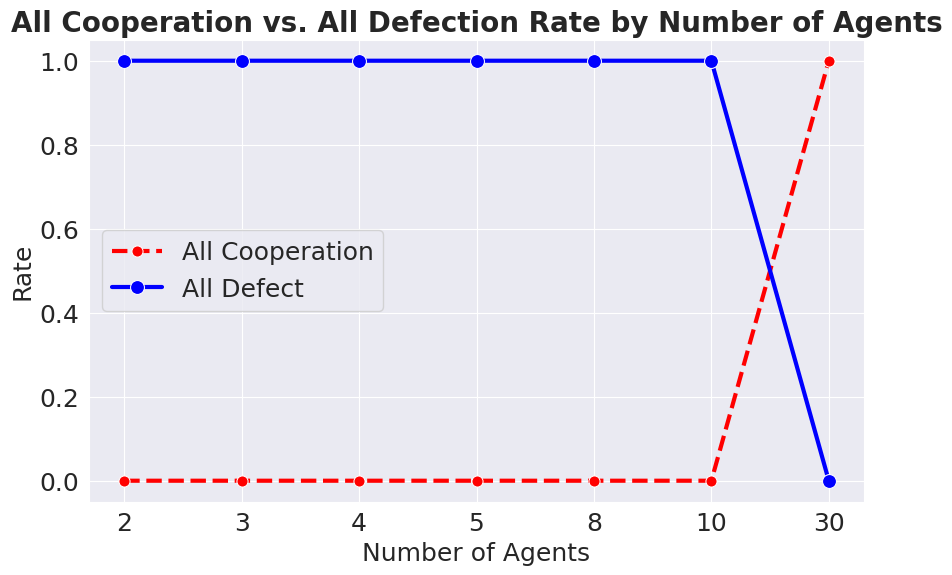

In [98]:
root_dir = "results/gpt-3.5-turbo/single_turn"

GPT_VERSION, flag = root_dir.split("/")[-2], root_dir.split("/")[-1]
print(GPT_VERSION, flag)
import os
import json
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

all_exps = os.listdir(root_dir)

# sort by the number in the name
all_exps = sorted(all_exps, key=lambda x: int(x.split("_")[0]))

all_n_players = [m .split("_")[0] for m in all_exps]
all_defs = []
all_coops = []
for n_player, exp in zip(all_n_players, all_exps):
    # print(exp)

    # init
    all_def = 0
    all_coop = 0

    # Load data
    df = pd.read_csv(os.path.join(root_dir, exp))

    data = []
    evaluate_times = len(df)
    
    # print('length: ', length)
    for index, row in df.iterrows():
        # print(row.tolist())
        if 'cooperate' not in row.tolist():
            all_def += 1
            # print('def count: ', all_def)
        if 'defect' not in row.tolist():
            all_coop += 1
        
    print(f'{n_player} ({evaluate_times} evals)| All defect: {all_def/evaluate_times}, All coop: {all_coop/evaluate_times}')

    all_defs.append(all_def/evaluate_times)
    all_coops.append(all_coop/evaluate_times)

# 使用seaborn绘图
sns.set_style("darkgrid")
sns.set_palette("pastel")

plt.figure(figsize=(10, 6))
# sns.lineplot(x=Ns, y=success_rates, marker="o")



# 画第一条线：所有玩家合作
sns.lineplot(x=all_n_players, y=all_coops, marker="o", markersize = 8,
              color="red", label="All Cooperation", 
              linestyle='--', linewidth=3
              )

# 画第二条线：所有玩家背叛
sns.lineplot(x=all_n_players, y=all_defs, marker="o", markersize=10
             , color="blue", label="All Defect", linestyle='solid', linewidth=3)


# 设置标题和轴标签
# plt.title("All Coop, All Def vs. Number of Agents")
plt.title("All Cooperation vs. All Defection Rate by Number of Agents", fontsize=20, fontweight='bold')
plt.xlabel("Number of Agents")
plt.ylabel("Rate")
plt.xticks(all_n_players)  # 设置x轴的刻度为agent的数量
plt.yticks(np.arange(0, 1.2, 0.2))  # 设置y轴的刻度为0.1的倍数
plt.legend(loc="best")  # 你可以根据需要调整图例的位置

# 设置字体大小
plt.rcParams.update({'font.size': 18})

# 保存图形为PNG文件
plt.savefig(f"figs/{flag}/{GPT_VERSION}/AllCo_AllDef_vs_agents_{evaluate_times}eval.png", dpi=300, bbox_inches='tight')


# 显示图形
plt.show()
